# Kaggle Dog Dataset

## 设置数据目录

In [1]:
import os

data_root_dir = '/home/yansheng/kaggle_dog'
train_dir = 'train'
label_file = 'labels.csv'
test_dir = 'test'
output_dir = 'train_valid_test'

## 训练集与测试集数量

In [20]:
import glob

num_train_samples = len(glob.glob(os.path.join(data_root_dir, train_dir,'*.jpg')))
num_test_samples = len(glob.glob(os.path.join(data_root_dir, test_dir,'*.jpg')))
print('training_samples: {}'.format(num_train_samples))
print('testing_samples: {}'.format(num_test_samples))

training_samples: 10222
testing_samples: 10357


## 统计训练集中每类样本的数量

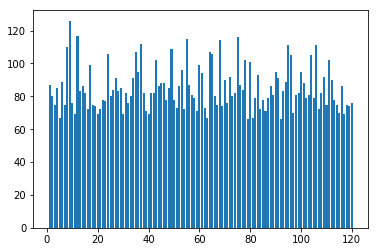

In [41]:
# 读取训练数据的标签，并把它保存在一个字典里
import matplotlib.pyplot as plt
import numpy as np

with open(os.path.join(data_root_dir, label_file), 'r') as f:
    lines = f.readlines()[1:] #第一行是头行，跳过去
    tokens = [l.rstrip().split(',') for l in lines]
    idx_label = dict(((idx, label) for idx, label in tokens))
labels = set(idx_label.values()) # 去重

org_label_count = {}
for label in idx_label.values():
    org_label_count[label] = org_label_count.get(label, 0) + 1
x = np.linspace(1, len(org_label_count.values()), len(org_label_count.values()))
y = np.array(list(org_label_count.values()))

plt.bar(x, y)
plt.show()

In [22]:
print('min = {}'.format(min(org_label_count.values())))
print('max = {}'.format(max(org_label_count.values())))

min = 66
max = 126


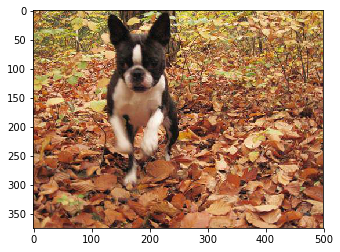

In [51]:
import mxnet.image as mximg
for key,value in idx_label.items():
    with open(os.path.join(data_root_dir, train_dir, key) + '.jpg', 'rb') as fp:
        str_image = fp.read()
    im = mximg.imdecode(str_image)
    plt.imshow(im.asnumpy())
    plt.show()
    break;

## 整理数据

1. 将测试集分为两个部分：训练集+验证集
2. 将数据按照各自对应的label，放到适当的文件夹中。

In [52]:
import shutil

def mkdir_if_not_exist(path):
        if not os.path.exists(os.path.join(*path)):
            os.makedirs(os.path.join(*path))

valid_ratio = 0.2 # 验证集的比例
label_count = dict() # 用户统计已经整理到每类文件夹中训练数据的数量，达到数量后，剩下的拷贝到验证集文件夹

for train_file in os.listdir(os.path.join(data_root_dir, train_dir)):
    idx = train_file.split('.')[0] # 分离出该样本对应的index
    label = idx_label[idx] # 样本对应的label
    mkdir_if_not_exist([data_root_dir, output_dir, 'train_valid', label])
    shutil.copy(os.path.join(data_root_dir, train_dir, train_file),
                    os.path.join(data_root_dir, output_dir, 'train_valid', label))
    if label not in label_count or label_count[label] < org_label_count[label] * (1 - valid_ratio):
            mkdir_if_not_exist([data_root_dir, output_dir, 'train', label])
            shutil.copy(os.path.join(data_root_dir, train_dir, train_file),
                        os.path.join(data_root_dir, output_dir, 'train', label))
            label_count[label] = label_count.get(label, 0) + 1
    else:
        mkdir_if_not_exist([data_root_dir, output_dir, 'valid', label])
        shutil.copy(os.path.join(data_root_dir, train_dir, train_file),
                    os.path.join(data_root_dir, output_dir, 'valid', label))

In [54]:
mkdir_if_not_exist([data_root_dir, output_dir, 'test', 'unknown'])
for test_file in os.listdir(os.path.join(data_root_dir, test_dir)):
    shutil.copy(os.path.join(data_root_dir, test_dir, test_file),
                os.path.join(data_root_dir, output_dir, 'test', 'unknown'))